Nama:

In [1]:
print('Rahman Aziz Firmansyah')

Rahman Aziz Firmansyah


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

(1) Import dataset credit card application. Jadikan kolom 'status' menjadi kolom target, dengan accepted = 1, not accepted = 0.

In [2]:
cc_app = pd.read_csv('cc_application.csv')
cc_app.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1


(2) Periksa adanya missing value pada dataset, dan lakukan dropna apabila sedikit jumlahnya.

In [3]:
cc_app.isna().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

Karena tidak ada fitur yang memiliki missing value maka tidak ada kolom yang didrop

(3) Lakukan train test split, test:test = 4:1, stratify = y.

In [4]:
#fungsi untuk mentransformasi data set
def transform(data, label, scaler, num, cat):
    X = data.drop(label, axis=1)
    y = data[label]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    ohe = OneHotEncoder()
    
    X_train_transformed = pd.concat([pd.DataFrame(scaler.fit_transform(X_train[num]), 
                                                  columns=scaler.feature_names_in_),
                                     pd.DataFrame(ohe.fit_transform(X_train[cat]).toarray(),
                                                  columns=ohe.get_feature_names_out(ohe.feature_names_in_))],
                                    axis = 1)
    X_test_transformed = pd.concat([pd.DataFrame(scaler.transform(X_test[num]), 
                                                  columns=scaler.feature_names_in_),
                                     pd.DataFrame(ohe.transform(X_test[cat]).toarray(),
                                                  columns=ohe.get_feature_names_out(ohe.feature_names_in_))],
                                    axis = 1)
    
    return X_train_transformed, X_test_transformed, y_train, y_test

In [5]:
#menyimpan kolom objek dan numerik
num_cols = cc_app.select_dtypes('number').columns.drop('Status')
obj_cols = cc_app.select_dtypes('object').columns

(4) Lakukan transformasi yang diperlukan pada X_train  (imputation/onehotencoding/scaling). Lakukan transformasi serupa pada X_test tanpa melakukan fitting kembali.

In [6]:
X_train_transformed, X_test_transformed, y_train, y_test = transform(cc_app, 'Status', MinMaxScaler(), num_cols, obj_cols)

(5) Buat 2 model Decision Tree. 1 tanpa tuning. 1 dengan tuning. Untuk model yang dilakukan tuning, lakukan cross-validation (score yang dipakai tidak harus akurasi, pilih yang lain apabila menurut Anda diperlukan) dengan untuk menentukan nilai optimal untuk hyperparameter: <p>
max_features, max_depth, min_sample_split, min_sample_leaf, max_leaf_nodes. <p>
Print classification report untuk trainset dan testset (default vs tuned. Apakah model tuning meningkatkan performance?

In [8]:
#model decision tree tanpa tuning
dtree1 = DecisionTreeClassifier(max_depth=4)

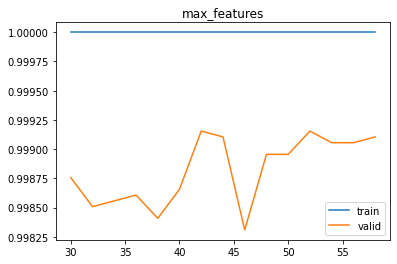

In [9]:
#tuning hyperparameter untuk model kedua
#mencari parameter max_features optimum
params = np.arange(30, 60, 2)
valid = []
train = []
for par in params:
    dtree_opt = DecisionTreeClassifier(max_features = par)
    result = cross_validate(dtree_opt, X_train_transformed, y_train, cv = 5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('max_features')
plt.show()

In [10]:
max_features_final = params[np.argmax(valid)]
max_features_final

42

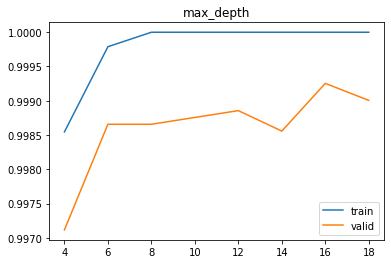

In [11]:
#mencari parameter max_depth optimum
params = np.arange(4, 20, 2)
valid = []
train = []
for par in params:
    dtree_opt = DecisionTreeClassifier(max_features = max_features_final, max_depth = par)
    result = cross_validate(dtree_opt, X_train_transformed, y_train, cv = 5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('max_depth')
plt.show()

In [12]:
max_depth_final = params[np.argmax(valid)]
max_depth_final

16

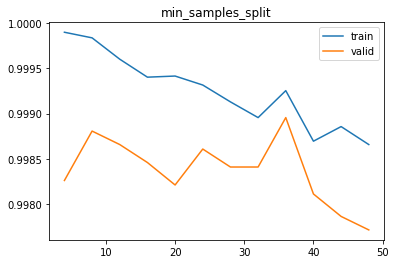

In [13]:
#mencari parameter min_samples_split optimum
params = np.arange(4, 50, 4)
valid = []
train = []
for par in params:
    dtree_opt = DecisionTreeClassifier(max_features = max_features_final, max_depth = max_depth_final, min_samples_split = par)
    result = cross_validate(dtree_opt, X_train_transformed, y_train, cv = 5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('min_samples_split')
plt.show()

In [14]:
min_samples_split_final = params[np.argmax(valid)]
min_samples_split_final

36

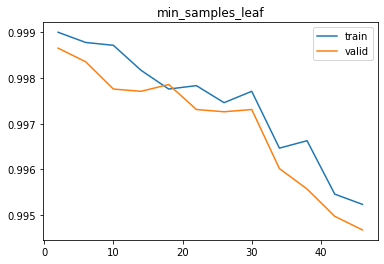

In [15]:
#mencari parameter min_samples_leaf optimum
params = np.arange(2, 50, 4)
valid = []
train = []
for par in params:
    dtree_opt = DecisionTreeClassifier(max_features = max_features_final, max_depth = max_depth_final, 
    min_samples_split = min_samples_split_final, min_samples_leaf=par)
    result = cross_validate(dtree_opt, X_train_transformed, y_train, cv = 5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('min_samples_leaf')
plt.show()

In [16]:
min_samples_leaf_final = params[np.argmax(valid)]
min_samples_leaf_final

2

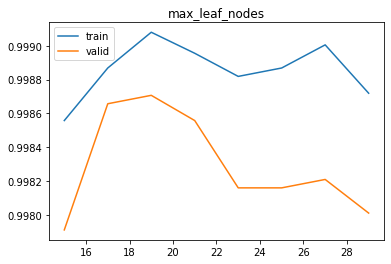

In [17]:
#mencari parameter max_leaf_nodes optimum
params = np.arange(15, 30, 2)
valid = []
train = []
for par in params:
    dtree_opt = DecisionTreeClassifier(max_features = max_features_final, max_depth = max_depth_final, 
    min_samples_split = min_samples_split_final, min_samples_leaf=min_samples_leaf_final, max_leaf_nodes=par)
    result = cross_validate(dtree_opt, X_train_transformed, y_train, cv = 5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('max_leaf_nodes')
plt.show()

In [18]:
max_leaf_nodes_final = params[np.argmax(valid)]
max_leaf_nodes_final

19

In [19]:
#menyiapkan model decision tree dengan tuning hyperparameter
dtree2 = DecisionTreeClassifier(max_features=max_features_final, max_depth=max_depth_final, max_leaf_nodes=max_leaf_nodes_final,
min_samples_leaf=min_samples_leaf_final, min_samples_split = min_samples_split_final)

In [20]:
#fitting model
dtree1.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=4)

In [21]:
dtree2.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=16, max_features=42, max_leaf_nodes=19,
                       min_samples_leaf=2, min_samples_split=36)

In [22]:
#classification report untuk model 1, tanpa tuning
y_pred_train1 = dtree1.predict(X_train_transformed)
print(classification_report(y_train, y_pred_train1))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        97
           1       1.00      1.00      1.00     20005

    accuracy                           1.00     20102
   macro avg       0.97      0.92      0.94     20102
weighted avg       1.00      1.00      1.00     20102



In [23]:
y_pred_test1 = dtree1.predict(X_test_transformed)
print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       0.90      0.92      0.91      5026
weighted avg       1.00      1.00      1.00      5026



In [24]:
#classification report untuk model 2, dengan tuning
y_pred_train2 = dtree2.predict(X_train_transformed)
print(classification_report(y_train, y_pred_train2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        97
           1       1.00      1.00      1.00     20005

    accuracy                           1.00     20102
   macro avg       0.96      0.98      0.97     20102
weighted avg       1.00      1.00      1.00     20102



In [25]:
y_pred_test2 = dtree2.predict(X_test_transformed)
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       0.90      0.98      0.93      5026
weighted avg       1.00      1.00      1.00      5026



Berdasarkan nilai precision dan recall kedua model, model tanpa tuning hyperparameter menununjukkan performa yang lebih baik dibandingkan model dengan tuning hyperparameter karena model dengan tuning menunjukkan overfitting

(6) Buat 2 model Random Forest. 1 tanpa tuning. 1 dengan tuning. Untuk model yang dilakukan tuning, lakukan cross-validation (score yang dipakai tidak harus akurasi, pilih yang lain apabila menurut Anda diperlukan) dengan untuk menentukan nilai optimal untuk hyperparameter: <p>
n_estimators, max_features, max_depth, min_sample_split, min_sample_leaf, max_leaf_nodes. <p>
Print classification report untuk trainset dan testset (default vs tuned. Apakah model tuning meningkatkan performance?

In [26]:
#membuat model random forest dan fitting terhadap data set training
rf_1 = RandomForestClassifier()
rf_1.fit(X_train_transformed, y_train)

RandomForestClassifier()

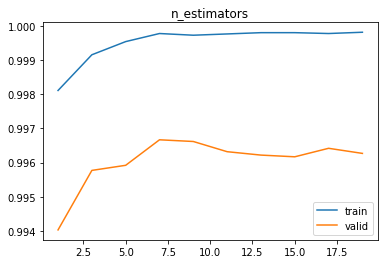

In [27]:
#tuning hyperparameter untuk model random forest kedua
#mencari nilai n_estimators optimum
train = []
valid = []
params = np.arange(1, 20, 2)
for par in params:
    rf_opt = RandomForestClassifier(n_estimators=par)
    result = cross_validate(rf_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('n_estimators')
plt.show()

In [28]:
n_estimators_rf_final = params[np.argmax(valid)]
n_estimators_rf_final

7

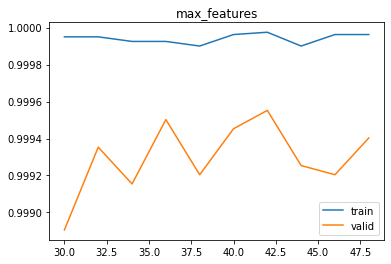

In [31]:
#mencari nilai max_features optimum
train = []
valid = []
params = np.arange(30, 50, 2)
for par in params:
    rf_opt = RandomForestClassifier(n_estimators=n_estimators_rf_final, max_features=par)
    result = cross_validate(rf_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('max_features')
plt.show()

In [32]:
max_features_rf_final = params[np.argmax(valid)]
max_features_rf_final

42

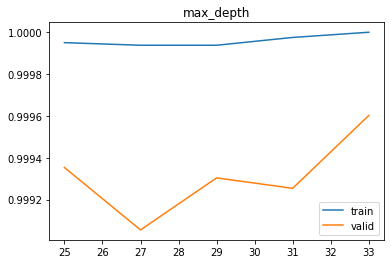

In [34]:
#mencari nilai max_depth optimum
train = []
valid = []
params = np.arange(25, 35, 2)
for par in params:
    rf_opt = RandomForestClassifier(n_estimators=n_estimators_rf_final, max_features=max_features_rf_final,
    max_depth=par)
    result = cross_validate(rf_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('max_depth')
plt.show()

In [35]:
max_depth_rf_final = params[np.argmax(valid)]
max_depth_rf_final

33

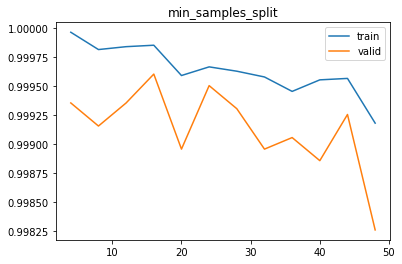

In [36]:
#mencari nilai min_samples_split optimum
train = []
valid = []
params = np.arange(4, 50, 4)
for par in params:
    rf_opt = RandomForestClassifier(n_estimators=n_estimators_rf_final, max_features=max_features_rf_final,
    max_depth=max_depth_rf_final, min_samples_split=par)
    result = cross_validate(rf_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('min_samples_split')
plt.show()

In [37]:
min_samples_split_rf_final = params[np.argmax(valid)]
min_samples_split_rf_final

16

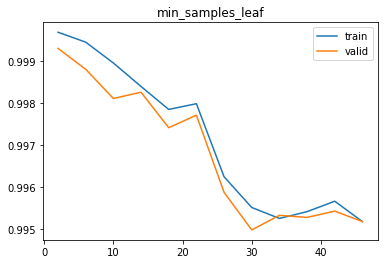

In [38]:
#mencari nilai min_samples_leaf optimum
train = []
valid = []
params = np.arange(2, 50, 4)
for par in params:
    rf_opt = RandomForestClassifier(n_estimators=n_estimators_rf_final, max_features=max_features_rf_final,
    max_depth=max_depth_rf_final, min_samples_split=min_samples_split_rf_final, min_samples_leaf=par)
    result = cross_validate(rf_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('min_samples_leaf')
plt.show()

In [39]:
min_samples_leaf_rf_final = params[np.argmax(valid)]
min_samples_leaf_rf_final

2

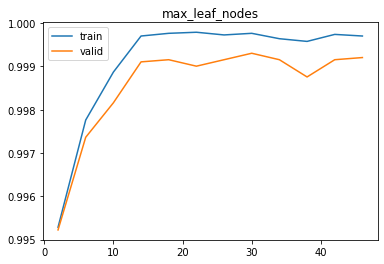

In [40]:
#mencari nilai max_leaf_nodes optimum
train = []
valid = []
params = np.arange(2, 50, 4)
for par in params:
    rf_opt = RandomForestClassifier(n_estimators=n_estimators_rf_final, max_features=max_features_rf_final,
    max_depth=max_depth_rf_final, min_samples_split=min_samples_split_rf_final, min_samples_leaf=min_samples_leaf_rf_final,
    max_leaf_nodes=par)
    result = cross_validate(rf_opt, X_train_transformed, y_train, cv=5, return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())
sns.lineplot(x=params, y=train, label='train')
sns.lineplot(x=params, y=valid, label='valid')
plt.title('max_leaf_nodes')
plt.show()

In [41]:
max_leaf_nodes_rf_final = params[np.argmax(valid)]
max_leaf_nodes_rf_final

30

In [42]:
rf_2 = RandomForestClassifier(n_estimators=n_estimators_rf_final, max_depth=max_depth_rf_final, min_samples_split=min_samples_split_rf_final,
min_samples_leaf=min_samples_leaf_rf_final, max_leaf_nodes=max_leaf_nodes_rf_final)
rf_2.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=33, max_leaf_nodes=30, min_samples_leaf=2,
                       min_samples_split=16, n_estimators=7)

In [43]:
#classification report untuk model random forest pertama (tanpa tuning)
y_pred_train1_rf = rf_1.predict(X_train_transformed)
print(classification_report(y_train, y_pred_train1_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00     20005

    accuracy                           1.00     20102
   macro avg       1.00      1.00      1.00     20102
weighted avg       1.00      1.00      1.00     20102



In [46]:
y_pred_test1_rf = rf_1.predict(X_test_transformed)
print(classification_report(y_test, y_pred_test1_rf))

              precision    recall  f1-score   support

           0       0.93      0.58      0.72        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       0.97      0.79      0.86      5026
weighted avg       1.00      1.00      1.00      5026



In [47]:
#classification report untuk model kedua (dengan tuning)
y_pred_train2_rf = rf_2.predict(X_train_transformed)
print(classification_report(y_train, y_pred_train2_rf))

              precision    recall  f1-score   support

           0       1.00      0.13      0.24        97
           1       1.00      1.00      1.00     20005

    accuracy                           1.00     20102
   macro avg       1.00      0.57      0.62     20102
weighted avg       1.00      1.00      0.99     20102



In [48]:
y_pred_test2_rf = rf_2.predict(X_test_transformed)
print(classification_report(y_test, y_pred_test2_rf))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       1.00      1.00      1.00      5002

    accuracy                           1.00      5026
   macro avg       1.00      0.54      0.58      5026
weighted avg       1.00      1.00      0.99      5026



Model random forest tanpa tuning overfit, artinya model tersebut gagal untuk menggeneralisasi training set. Sementara itu model dengan tuning lebih baik namun nilai recall 0 nya sangat rendah (nilai false positif jauh lebih besar dibandingkan true negatif)

(7) Manakah model yang menurut Anda lebih baik dalam memprediksi hasil aplikasi kartu kredit pada dataset ini?

Dari semua model, decision tree tanpa tuning menunjukkan bias-variance tradeoff yang seimbang dibandingkan model-model lainnya sehingga model tersebut dianggap lebih baik untuk memprediksi applikasi kartu kredit dalam data set yang digunakan.

In [7]:
X_train_transformed.to_csv('X_train_transformed.csv')
X_test_transformed.to_csv('X_test_transformed.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')